In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import semimage
import os

In [48]:
%load_ext autoreload
%autoreload 2
%aimport semimage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
d = '/Users/nik/Dropbox/test/manual_marks'
os.chdir(d)

In [13]:
im = np.load('matched_median_filtered_im.npy')

In [127]:
# the manual_marks module was used to find the markers by clicking on each of them
# getting it to work in this notebook is not super important to me

import manual_marks as mm
%aimport manual_marks

def estimate_square(pnts, shape):
    d = np.linalg.norm(pnts-np.roll(pnts,1, axis=0), axis=1)
    a = np.mean(d)/2.0
    y0, x0 = (s/2.0 for s in shape)
    return np.array(((x0+a,y0+a),
                     (x0+a,y0-a),
                     (x0-a,y0-a),
                     (x0-a,y0+a)))

pnts = np.array(((230.72580645,704.83333333),
                 (216.96236559, 72.83333333),
                 (790.89784946, 71.5       ),
                 (806.03763441,704.8333333)))

pnts = mm.order_points(pnts)
print pnts

[[ 806.03765869  704.83331299]
 [ 790.89782715   71.5       ]
 [ 216.96237183   72.83333588]
 [ 230.72579956  704.83331299]]


In [128]:
src = estimate_square(pnts,im.shape)
print src

[[ 813.86413574  685.86413574]
 [ 813.86413574   82.13586426]
 [ 210.13586426   82.13586426]
 [ 210.13586426  685.86413574]]


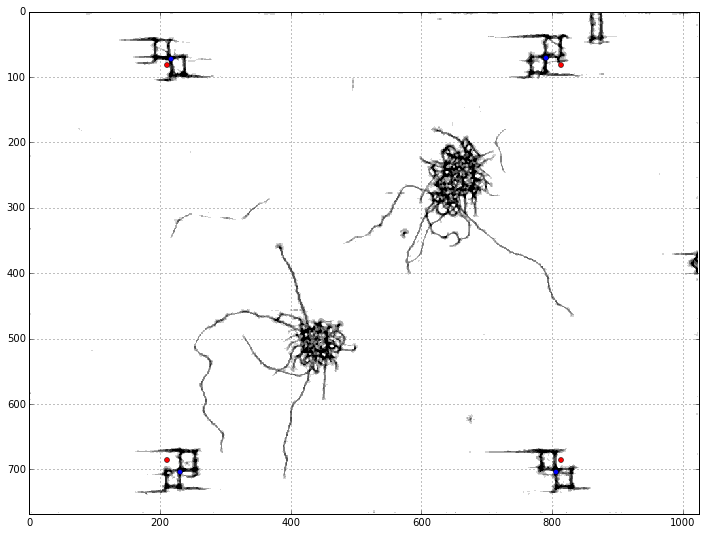

In [129]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
axim = ax.imshow(-im, cmap = plt.cm.gray, vmin=-6, vmax=0,
                 aspect = 'auto', interpolation = 'None')
ax.plot(src[:,0],src[:,1], 'ro', ms=5)
ax.plot(pnts[:,0],pnts[:,1], 'bo', ms=5)
ax.set_xlim(0, im.shape[1])
ax.set_ylim(im.shape[0], 0)
ax.grid()

In [130]:
from skimage import transform as tf

In [131]:
tform3 = tf.ProjectiveTransform()
tform3.estimate(src, pnts)
warped = tf.warp(im, tform3, output_shape=im.shape)

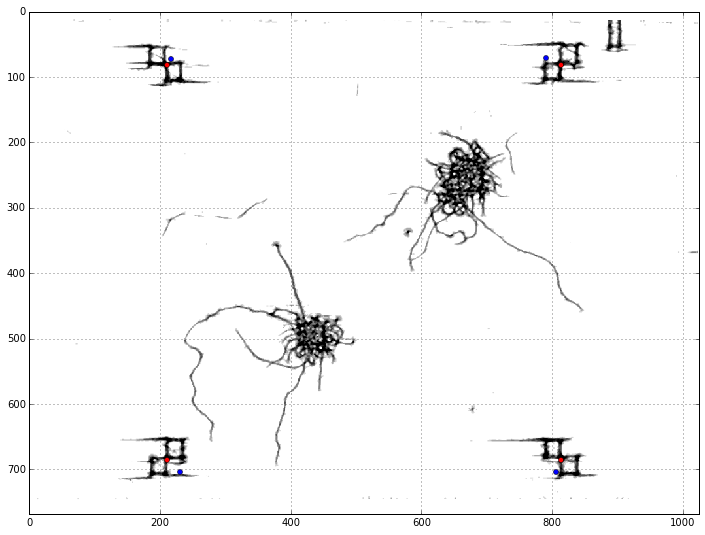

In [132]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
axim = ax.imshow(-warped, cmap = plt.cm.gray, vmin=-6, vmax=0,
                 aspect = 'auto', interpolation = 'None')
ax.plot(src[:,0],src[:,1], 'ro', ms=5)
ax.plot(pnts[:,0],pnts[:,1], 'bo', ms=5)
ax.set_xlim(0, im.shape[1])
ax.set_ylim(im.shape[0], 0)
ax.grid()

In [115]:
print src

[[ 685.86413574  813.86413574]
 [ 685.86413574  210.13586426]
 [  82.13586426  210.13586426]
 [  82.13586426  813.86413574]]
